BASADO EN : Clustering con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

# Cálculo de Distancias

El set de datos **USArrests** contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [3]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


In [4]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

------------------
Distancia euclídea
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


In [8]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia cityblock')
print('------------------')
distancias1 = pairwise_distances(
                X      = datos_scaled,
                metric ='cityblock'
             )

# Se descarta la diagonal superior de la matriz
distancias1[np.triu_indices(n=distancias1.shape[0])] = np.nan

distancias1 = pd.DataFrame(
                distancias1,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias1.iloc[:4,:4]

------------------
Distancia cityblock
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,4.280180,NaN,NaN,NaN
Arizona,4.478083,4.505562,NaN,NaN
Arkansas,2.319686,3.998950,4.756827,NaN


In [9]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia cosine')
print('------------------')
distancias2 = pairwise_distances(
                X      = datos_scaled,
                metric ='cosine'
             )

# Se descarta la diagonal superior de la matriz
distancias2[np.triu_indices(n=distancias2.shape[0])] = np.nan

distancias2 = pd.DataFrame(
                distancias2,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias2.iloc[:4,:4]

------------------
Distancia cosine
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,0.549507,NaN,NaN,NaN
Arizona,0.775744,0.511214,NaN,NaN
Arkansas,0.419331,0.646351,1.385628,NaN


In [18]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia braycurtis')
print('------------------')
distancias3 = pairwise_distances(
                X      = datos_scaled,
                metric ='braycurtis'
             )

# Se descarta la diagonal superior de la matriz
distancias3[np.triu_indices(n=distancias3.shape[0])] = np.nan

distancias3 = pd.DataFrame(
                distancias3,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias3.iloc[:4,:4]

------------------
Distancia braycurtis
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,0.539522,NaN,NaN,NaN
Arizona,0.870361,0.645950,NaN,NaN
Arkansas,0.537609,0.594181,1.598321,NaN


In [5]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124


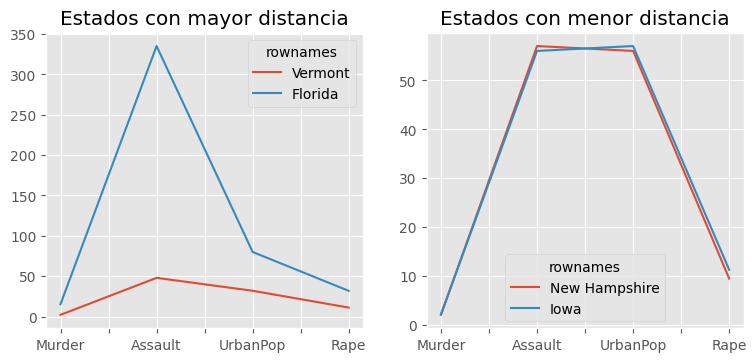

In [6]:
# Estados con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');

# EJERCICIO

Dos de las librerías de python que implementan las distancias  (junto con otras) son **sklearn.metrics.pairwise_distances** y **scipy.spatial.distance**.

En concreto, **sklearn** permite calcular las distancias: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’ y ‘yule’.

A partir de los datos de **USArrests** y tomando como guía el ejemplo anterior, calcule a lo menos 4 distancias con distintos métodos y grafique las respectivas similaridades.

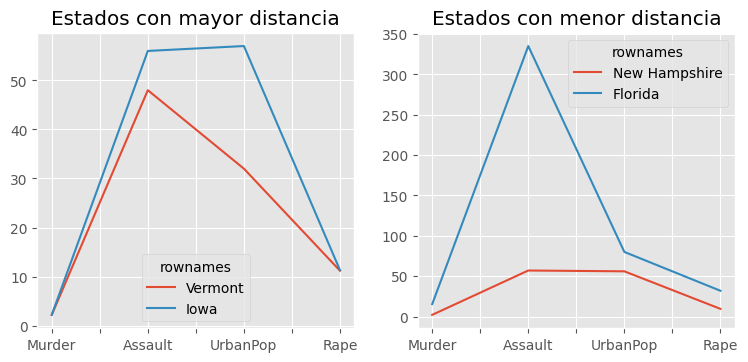

In [7]:
# Estados con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Iowa']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Florida']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');